In [251]:
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso

In [252]:
# Загрузка данных
X = pd.read_csv('X.csv', index_col=0)
y = pd.read_csv('y.csv', index_col=0).iloc[:,0]

In [253]:
X = X[:200]
y = y[:200]

In [254]:
# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
K = int(len(X_scaled) * 0.8)
X_train, X_test, y_train, y_test = X_scaled[:K], X_scaled[K:], y[:K], y[K:]

In [255]:
model = XGBRegressor(n_estimators=100, verbosity=1)
model.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mse, mae, mape)

69725.54856104255 174.11005249023438 0.18959016043792443


In [256]:
y_pred_train = model.predict(X_train)

In [302]:
train_target_df = pd.DataFrame({'Value': y_train, 'Type': ['Target'] * len(y_train), 'JobID': range(len(y_train))})
train_prediction_df = pd.DataFrame({'Value': y_pred_train, 'Type': ['Prediction'] * len(y_train), 'JobID': range(len(y_train))})
train_full_values = pd.concat([train_target_df, train_prediction_df])

In [305]:
test_target_df = pd.DataFrame({'Value': y_test, 'Type': ['Target'] * len(y_test), 'JobID': range(len(X_train), len(X_scaled))})
test_prediction_df = pd.DataFrame({'Value': y_pred, 'Type': ['Prediction'] * len(y_test), 'JobID': range(len(X_train), len(X_scaled))})
test_full_values = pd.concat([train_full_values, target_df, prediction_df])

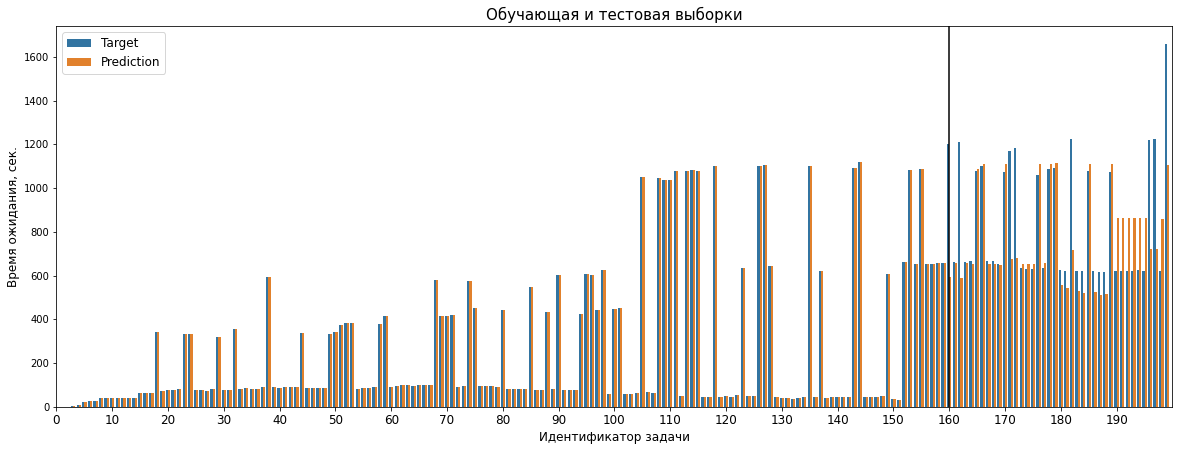

In [418]:
plt.figure(figsize=(20, 7))
sns.barplot(data=test_full_values, x='JobID', y='Value', hue='Type')
# plt.title('Обучающая и тестовая выборки', fontsize=15)
plt.ylabel('Время ожидания, сек.', fontsize=12)
plt.xlabel('Идентификатор задачи', fontsize=12)
ax = plt.gca()
plt.xlim([0, 200])
ax.set_xticks(range(0, max(test_full_values.JobID), 10))
plt.xticks(rotation=0, fontsize=12)
plt.axvline(x=160, color='black')
plt.legend(fontsize=12)
plt.show()

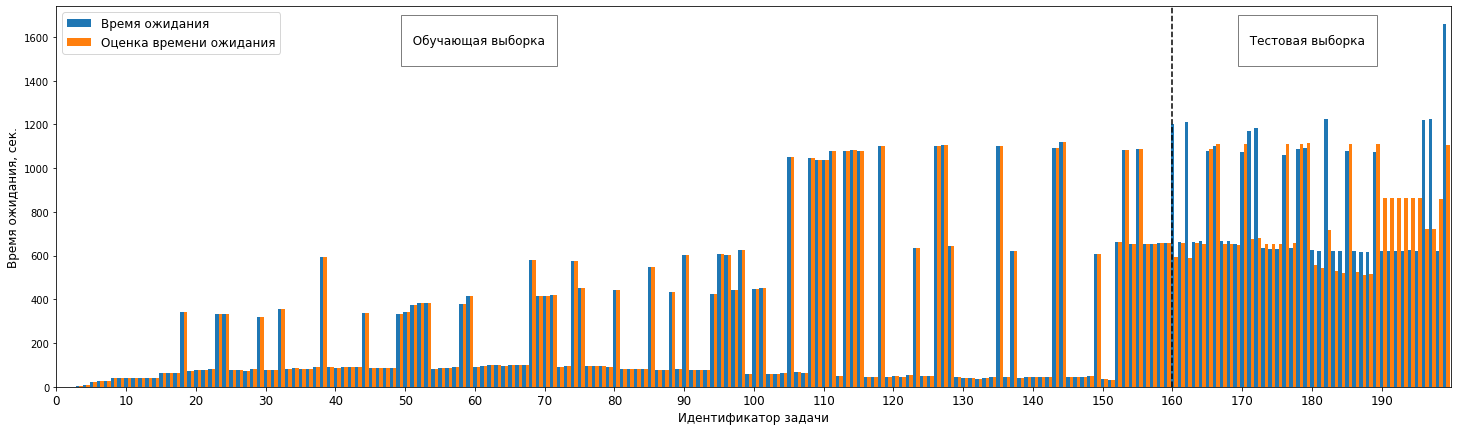

In [420]:
plt.figure(figsize=(25, 7))
plt.bar(np.arange(sum(targer_mask)), test_full_values[targer_mask].Value.reset_index(drop=True), label='Время ожидания', width=0.5, color='C0')
plt.bar(np.arange(sum(preds_mask)) + 0.5, test_full_values[preds_mask].Value.reset_index(drop=True), label='Оценка времени ожидания', width=0.5, color='C1')
# plt.title('Обучающая и тестовая выборки', fontsize=15)
plt.ylabel('Время ожидания, сек.', fontsize=12)
plt.xlabel('Идентификатор задачи', fontsize=12)
ax = plt.gca()
plt.xlim([0, 200])
ax.set_xticks(range(0, max(test_full_values.JobID), 10))
plt.xticks(rotation=0, fontsize=12)
plt.axvline(x=160, color='black', linestyle='--')
plt.legend(fontsize=12)
plt.text(x=170, y=1500, s='\n  Тестовая выборка  \n', fontsize=12, bbox = dict(facecolor = 'white', alpha = 0.5))
plt.text(x=50, y=1500, s='\n  Обучающая выборка  \n', fontsize=12, bbox = dict(facecolor = 'white', alpha = 0.5))
plt.savefig('plot_experiment1.pdf', format='pdf')
plt.show()

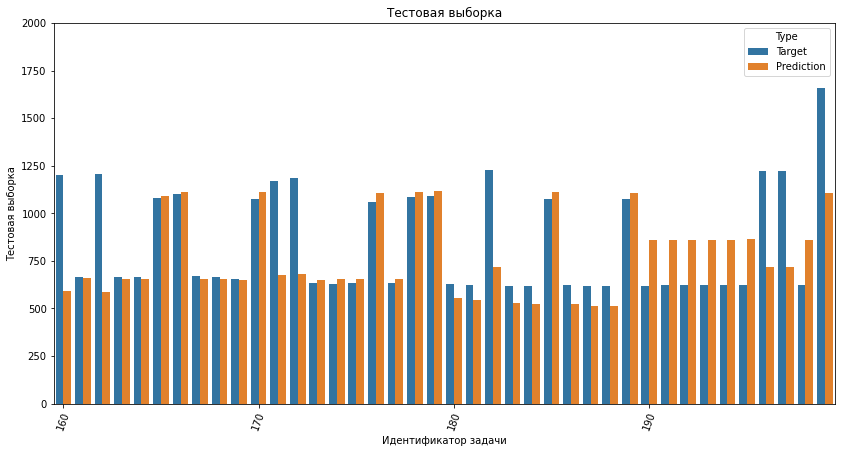

In [261]:
plt.figure(figsize=(14, 7))
sns.barplot(data=full_values, x='JobID', y='Value', hue='Type')
plt.title('Тестовая выборка')
plt.xlabel('Идентификатор задачи')
plt.ylabel('Тестовая выборка')
plt.xticks(rotation=70)
ax = plt.gca()
ax.set_xticks(range(0, 200 - 160, 10))
ax.set_ylim(0, 2000)
plt.xticks(rotation=70)
plt.show()


In [234]:
slurm_estimation = pd.read_csv('slurm_estimations.csv').loc[:199]

In [235]:
slurm_estimation_test = slurm_estimation[K:]['slurm_estimation']
slurm_estimation_train = slurm_estimation[:K]['slurm_estimation']

In [237]:
mse = mean_squared_error(y_test, slurm_estimation_test)
mae = mean_absolute_error(y_test, slurm_estimation_test)
mape = mean_absolute_percentage_error(y_test, slurm_estimation_test)
mse, mae, mape

(971054.6841979731, 840.8987780499999, 1.254937962001544)